In [1]:
import pandas as pd
#import glob
#import json

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [2]:
# Read multiple files into one dataframe
#allfiles = glob.glob('C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\*.csv')
# df = pd.concat((pd.read_csv(f) for f in allfiles))

In [3]:
T201605 = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\T201605PDPI+BNFT.csv")

In [4]:
T201605 = T201605[T201605['bnf_code'] == 8687]

In [5]:
len(T201605), T201605[T201605['practice'] == 5544]

(1645,     practice  bnf_code  bnf_name  items      nic  act_cost  quantity
 75      5544      8687      1263    412  3018.41   2860.88    224733)

In [6]:
T201606 = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\T201606PDPI+BNFT.csv")

In [7]:
T201606 = T201606[T201606['bnf_code'] == 8687]
T201606 = T201606[T201606['practice'].isin(T201605['practice'])]

In [8]:
len(T201606)

1521

In [9]:
T201607 = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\T201607PDPI+BNFT.csv")

In [10]:
T201607 = T201607[T201607['bnf_code'] == 8687]
T201607 = T201607[T201607['practice'].isin(T201605['practice'])]

In [11]:
len(T201607)

1476

In [12]:
T201608 = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\T201608PDPI+BNFT.csv")

In [13]:
T201608 = T201608[T201608['bnf_code'] == 8687]
T201608 = T201608[T201608['practice'].isin(T201605['practice'])]

In [14]:
len(T201608)

1446

In [15]:
T201609 = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\T201609PDPI+BNFT.csv")

In [16]:
T201609 = T201609[T201609['bnf_code'] == 8687]
T201609 = T201609[T201609['practice'].isin(T201605['practice'])]

In [17]:
len(T201609)

1420

In [18]:
T201610 = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\T201610PDPI+BNFT.csv")

In [19]:
T201610 = T201610[T201610['bnf_code'] == 8687]
T201610 = T201610[T201610['practice'].isin(T201605['practice'])]

In [20]:
len(T201610)

1387

In [21]:
T201611 = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\T201611PDPI+BNFT.csv")

In [22]:
T201611 = T201611[T201611['bnf_code'] == 8687]
T201611 = T201611[T201611['practice'].isin(T201605['practice'])]

In [23]:
len(T201611)

1347

In [24]:
T201612 = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\T201612PDPI+BNFT.csv")

In [25]:
T201612 = T201612[T201612['bnf_code'] == 8687]
print(len(T201612))
T201612 = T201612[T201612['practice'].isin(T201605['practice'])]
print(len(T201612))

1443
1294


In [26]:
len(T201612)

1294

In [27]:
T201701 = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\T201701PDPI+BNFT.csv")

In [28]:
T201701 = T201701[T201701['bnf_code'] == 8687]
T201701 = T201701[T201701['practice'].isin(T201605['practice'])]

In [29]:
len(T201701)

1285

In [30]:
T201702 = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\T201702PDPI+BNFT.csv")

In [31]:
T201702 = T201702[T201702['bnf_code'] == 8687]
T201702 = T201702[T201702['practice'].isin(T201605['practice'])]

In [32]:
len(T201702)

1274

In [33]:
T201703 = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\T201703PDPI+BNFT.csv")

In [34]:
T201703 = T201703[T201703['bnf_code'] == 8687]
T201703 = T201703[T201703['practice'].isin(T201605['practice'])]

In [35]:
len(T201703)

1243

In [36]:
T201605['month'] = 5
T201606['month'] = 6
T201607['month'] = 7
T201608['month'] = 8
T201609['month'] = 9
T201610['month'] = 10
T201611['month'] = 11
T201612['month'] = 12
T201701['month'] = 1
T201702['month'] = 2
T201703['month'] = 3

In [37]:
Training = pd.concat([T201605, T201606, T201607, T201608, T201609, T201610, T201611, T201612, T201701, T201702, T201703], axis=0)

In [38]:
len(Training)

15338

In [43]:
Training['month'].unique(), Training['bnf_code'].unique(), Training['practice'].unique()[0:10]

(array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3], dtype=int64),
 array([8687], dtype=int64),
 array([5544, 2884, 9809, 2628, 3356, 6054,  427, 6730, 5475, 6258],
       dtype=int64))

In [50]:
prtc = [5544, 9809, 2628, 3356, 6054]

In [51]:
Training5544 = Training[Training['practice'].isin(prtc)]

In [52]:
Training5544

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,month
75,5544,8687,1263,412,3018.41,2860.88,224733,5
461,9809,8687,1263,371,2344.60,2231.49,175774,5
2568,2628,8687,1263,24,203.76,191.66,15890,5
4215,3356,8687,1263,15,136.72,128.48,9439,5
7168,6054,8687,1263,9,45.45,43.33,3594,5
121,5544,8687,1263,408,2945.99,2792.60,217528,6
560,9809,8687,1263,317,2041.26,1943.99,152588,6
2546,2628,8687,1263,27,275.69,259.01,21880,6
4215,3356,8687,1263,25,245.22,230.34,18097,6
7192,6054,8687,1263,6,40.06,37.97,3180,6


In [53]:
Training5544.reset_index(drop = True, inplace = True)
Training5544

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,month
0,5544,8687,1263,412,3018.41,2860.88,224733,5
1,9809,8687,1263,371,2344.60,2231.49,175774,5
2,2628,8687,1263,24,203.76,191.66,15890,5
3,3356,8687,1263,15,136.72,128.48,9439,5
4,6054,8687,1263,9,45.45,43.33,3594,5
5,5544,8687,1263,408,2945.99,2792.60,217528,6
6,9809,8687,1263,317,2041.26,1943.99,152588,6
7,2628,8687,1263,27,275.69,259.01,21880,6
8,3356,8687,1263,25,245.22,230.34,18097,6
9,6054,8687,1263,6,40.06,37.97,3180,6


In [54]:
Training5544['quantityNext'] = Training5544['quantity']
Training5544['quantityNext'][0]

C:\Users\VEENA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


224733

In [55]:
for i in range(len(Training5544.index)-5):
    #if (Training5544['month'][i] == Training5544['month'][i+1]):
    Training5544['quantityNext'][i] = Training5544['quantity'][i+5]
    #else
     #   Training5544['quantityNext'][i]

C:\Users\VEENA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\VEENA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [56]:
Training5544

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,month,quantityNext
0,5544,8687,1263,412,3018.41,2860.88,224733,5,217528
1,9809,8687,1263,371,2344.60,2231.49,175774,5,152588
2,2628,8687,1263,24,203.76,191.66,15890,5,21880
3,3356,8687,1263,15,136.72,128.48,9439,5,18097
4,6054,8687,1263,9,45.45,43.33,3594,5,3180
5,5544,8687,1263,408,2945.99,2792.60,217528,6,216915
6,9809,8687,1263,317,2041.26,1943.99,152588,6,152839
7,2628,8687,1263,27,275.69,259.01,21880,6,17165
8,3356,8687,1263,25,245.22,230.34,18097,6,17496
9,6054,8687,1263,6,40.06,37.97,3180,6,3144


In [57]:
#for index, row in Training5544.iterrows():
#    print(row['month'])  

In [58]:
Training5544 = Training5544[0:50]

In [59]:
Training5544

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,month,quantityNext
0,5544,8687,1263,412,3018.41,2860.88,224733,5,217528
1,9809,8687,1263,371,2344.60,2231.49,175774,5,152588
2,2628,8687,1263,24,203.76,191.66,15890,5,21880
3,3356,8687,1263,15,136.72,128.48,9439,5,18097
4,6054,8687,1263,9,45.45,43.33,3594,5,3180
5,5544,8687,1263,408,2945.99,2792.60,217528,6,216915
6,9809,8687,1263,317,2041.26,1943.99,152588,6,152839
7,2628,8687,1263,27,275.69,259.01,21880,6,17165
8,3356,8687,1263,25,245.22,230.34,18097,6,17496
9,6054,8687,1263,6,40.06,37.97,3180,6,3144


In [60]:
prtc_encode = pd.get_dummies(Training5544['practice'])
prtc_encode

,2628,3356,5544,6054,9809
0,0,0,1,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,0,1,0
5,0,0,1,0,0
6,0,0,0,0,1
7,1,0,0,0,0
8,0,1,0,0,0
9,0,0,0,1,0


In [61]:
#dir(prtc_encode)

In [62]:
x = pd.concat([prtc_encode, Training5544['quantity']], axis=1)
y = Training5544['quantityNext']

x.shape, y.shape, x, y

((50, 6), (50,),     2628  3356  5544  6054  9809  quantity
 0      0     0     1     0     0    224733
 1      0     0     0     0     1    175774
 2      1     0     0     0     0     15890
 3      0     1     0     0     0      9439
 4      0     0     0     1     0      3594
 5      0     0     1     0     0    217528
 6      0     0     0     0     1    152588
 7      1     0     0     0     0     21880
 8      0     1     0     0     0     18097
 9      0     0     0     1     0      3180
 10     0     0     1     0     0    216915
 11     0     0     0     0     1    152839
 12     1     0     0     0     0     17165
 13     0     1     0     0     0     17496
 14     0     0     0     1     0      3144
 15     0     0     1     0     0    222641
 16     0     0     0     0     1    177760
 17     1     0     0     0     0     22885
 18     0     1     0     0     0     11900
 19     0     0     0     1     0      3140
 20     0     0     1     0     0    224736
 21     0     0 

In [63]:
#x = x.reshape(len(x), 3)
y = y.reshape(len(y), 1)
x.shape, y.shape, x, y

C:\Users\VEENA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


((50, 6), (50, 1),     2628  3356  5544  6054  9809  quantity
 0      0     0     1     0     0    224733
 1      0     0     0     0     1    175774
 2      1     0     0     0     0     15890
 3      0     1     0     0     0      9439
 4      0     0     0     1     0      3594
 5      0     0     1     0     0    217528
 6      0     0     0     0     1    152588
 7      1     0     0     0     0     21880
 8      0     1     0     0     0     18097
 9      0     0     0     1     0      3180
 10     0     0     1     0     0    216915
 11     0     0     0     0     1    152839
 12     1     0     0     0     0     17165
 13     0     1     0     0     0     17496
 14     0     0     0     1     0      3144
 15     0     0     1     0     0    222641
 16     0     0     0     0     1    177760
 17     1     0     0     0     0     22885
 18     0     1     0     0     0     11900
 19     0     0     0     1     0      3140
 20     0     0     1     0     0    224736
 21     0     

In [64]:
regressor = LinearRegression()
regressor.fit(x, y)

ypred = regressor.predict(x)

In [65]:
for i in range(len(y)):
    print(ypred[i], y[i])

[217901.69769862] [217528]
[163846.09129677] [152588]
[25597.13325763] [21880]
[16948.6849673] [18097]
[2838.98774485] [3180]
[219291.81956749] [216915]
[168319.56328175] [152839]
[24441.43166227] [17165]
[15278.22346268] [17496]
[2918.86428249] [3144]
[219410.09086598] [222641]
[168271.13571908] [177760]
[25351.13667431] [22885]
[15394.17949921] [11900]
[2925.81006838] [3140]
[218305.32503376] [224736]
[163462.91544228] [147671]
[24247.52847307] [25000]
[16473.86332687] [18384]
[2926.58182236] [3289]
[217901.11888312] [220835]
[169268.24187013] [149663]
[23839.4635525] [25970]
[15222.85011412] [18852]
[2897.83398635] [4053]
[218653.77195884] [210685]
[168883.90838466] [178635]
[23652.31321068] [26840]
[15132.55489766] [14202]
[2750.42897486] [3164]
[220612.09770056] [233944]
[163294.09425765] [169723]
[23484.45671853] [28550]
[16029.71890741] [14400]
[2921.95129844] [2702]
[216124.54120531] [218284]
[165013.56214043] [176327]
[23154.53188914] [25710]
[15991.51708506] [13930]
[3011.088

In [66]:
coeff_df = pd.DataFrame(regressor.coef_.T, columns=['Coefficient'])
coeff_df

,Coefficient
0,-73334.308753
1,-83227.403285
2,159264.110159
3,-98464.826021
4,95762.427896
5,-0.192938


In [68]:
print('Variance score (Train data): {}'.format(regressor.score(x, y)))

Variance score (Train data): 0.9926203439612101


In [69]:
#ypred3 = regressor.predict(225781)
#ypred3

In [70]:
T201704 = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\T201704PDPI+BNFT.csv")

In [71]:
T201704 = T201704[T201704['bnf_code'] == 8687]
T201704 = T201704[T201704['practice'].isin(T201605['practice'])]

In [72]:
T201705 = pd.read_csv("C:\\Users\\VEENA\\Datasets\\HealthnPharma\\general-practice-prescribing-data\\prescriptionFiles\\T201705PDPI+BNFT.csv")

In [73]:
T201705 = T201705[T201705['bnf_code'] == 8687]
T201705 = T201705[T201705['practice'].isin(T201605['practice'])]

In [74]:
len(T201704), len(T201705)

(1239, 1210)

In [75]:
T201704['month'] = 4
T201705['month'] = 5

In [76]:
Testing = pd.concat([T201703, T201704, T201705], axis=0)

In [77]:
len(Testing)

3692

In [78]:
Testing['month'].unique(), Testing['bnf_code'].unique(), Testing['practice'].unique()

(array([3, 4, 5], dtype=int64),
 array([8687], dtype=int64),
 array([5544, 9809, 2628, ..., 5573, 9370,  578], dtype=int64))

In [79]:
Testing5544 = Testing[Testing['practice'].isin(prtc)]
Testing5544

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,month
190,5544,8687,1263,410,3117.24,2955.65,225781,3
403,9809,8687,1263,354,2527.48,2405.11,192676,3
2080,2628,8687,1263,30,336.48,315.80,25340,3
3743,3356,8687,1263,21,250.60,234.72,17612,3
6707,6054,8687,1263,2,28.22,26.51,2240,3
175,5544,8687,1263,383,2755.84,2610.34,199080,4
504,9809,8687,1263,342,2450.36,2325.12,184782,4
2193,2628,8687,1263,27,343.39,321.31,25205,4
3799,3356,8687,1263,18,198.53,185.89,13708,4
6706,6054,8687,1263,7,86.56,81.15,6870,4


In [81]:
Testing5544.reset_index(drop = True, inplace = True)
Testing5544

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,month,quantityNext
0,5544,8687,1263,410,3117.24,2955.65,225781,3,225781
1,9809,8687,1263,354,2527.48,2405.11,192676,3,192676
2,2628,8687,1263,30,336.48,315.80,25340,3,25340
3,3356,8687,1263,21,250.60,234.72,17612,3,17612
4,6054,8687,1263,2,28.22,26.51,2240,3,2240
5,5544,8687,1263,383,2755.84,2610.34,199080,4,199080
6,9809,8687,1263,342,2450.36,2325.12,184782,4,184782
7,2628,8687,1263,27,343.39,321.31,25205,4,25205
8,3356,8687,1263,18,198.53,185.89,13708,4,13708
9,6054,8687,1263,7,86.56,81.15,6870,4,6870


In [82]:
Testing5544['quantityNext'] = Testing5544['quantity']
Testing5544['quantityNext'][0]

C:\Users\VEENA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


225781

In [83]:
for i in range(len(Testing5544.index)-5):
    #if (Training5544['month'][i] == Training5544['month'][i+1]):
    Testing5544['quantityNext'][i] = Testing5544['quantity'][i+5]
    #else
     #   Training5544['quantityNext'][i]

Testing5544

C:\Users\VEENA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\VEENA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,month,quantityNext
0,5544,8687,1263,410,3117.24,2955.65,225781,3,199080
1,9809,8687,1263,354,2527.48,2405.11,192676,3,184782
2,2628,8687,1263,30,336.48,315.80,25340,3,25205
3,3356,8687,1263,21,250.60,234.72,17612,3,13708
4,6054,8687,1263,2,28.22,26.51,2240,3,6870
5,5544,8687,1263,383,2755.84,2610.34,199080,4,219836
6,9809,8687,1263,342,2450.36,2325.12,184782,4,185489
7,2628,8687,1263,27,343.39,321.31,25205,4,21829
8,3356,8687,1263,18,198.53,185.89,13708,4,13062
9,6054,8687,1263,7,86.56,81.15,6870,4,9120


In [84]:
Testing5544 = Testing5544[0:10]
Testing5544

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,month,quantityNext
0,5544,8687,1263,410,3117.24,2955.65,225781,3,199080
1,9809,8687,1263,354,2527.48,2405.11,192676,3,184782
2,2628,8687,1263,30,336.48,315.80,25340,3,25205
3,3356,8687,1263,21,250.60,234.72,17612,3,13708
4,6054,8687,1263,2,28.22,26.51,2240,3,6870
5,5544,8687,1263,383,2755.84,2610.34,199080,4,219836
6,9809,8687,1263,342,2450.36,2325.12,184782,4,185489
7,2628,8687,1263,27,343.39,321.31,25205,4,21829
8,3356,8687,1263,18,198.53,185.89,13708,4,13062
9,6054,8687,1263,7,86.56,81.15,6870,4,9120


In [85]:
prtc_encode_test = pd.get_dummies(Testing5544['practice'])
prtc_encode_test

,2628,3356,5544,6054,9809
0,0,0,1,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,0,1,0
5,0,0,1,0,0
6,0,0,0,0,1
7,1,0,0,0,0
8,0,1,0,0,0
9,0,0,0,1,0


In [91]:
xtest = pd.concat([prtc_encode_test, Testing5544['quantity']], axis = 1)
ytest = Testing5544['quantityNext']
xtest, ytest

(   2628  3356  5544  6054  9809  quantity
 0     0     0     1     0     0    225781
 1     0     0     0     0     1    192676
 2     1     0     0     0     0     25340
 3     0     1     0     0     0     17612
 4     0     0     0     1     0      2240
 5     0     0     1     0     0    199080
 6     0     0     0     0     1    184782
 7     1     0     0     0     0     25205
 8     0     1     0     0     0     13708
 9     0     0     0     1     0      6870, 0    199080
 1    184782
 2     25205
 3     13708
 4      6870
 5    219836
 6    185489
 7     21829
 8     13062
 9      9120
 Name: quantityNext, dtype: int64)

In [87]:
#xtest = Testing5544['quantity']
#xtest

In [88]:
#xtest = xtest.reshape(len(xtest), 1)
#xtest.shape, xtest

In [92]:
ypredtest = regressor.predict(xtest)

for i in range(len(ypredtest)):
    print(ypredtest[i], ytest[i])

[217699.49815405] 199080
[160585.04482519] 184782
[23773.86446362] 25205
[15371.79863359] 13708
[3100.22646941] 6870
[222851.14895501] 219836
[162108.1013183] 185489
[23799.91116067] 21829
[16125.03052479] 13062
[2206.92122959] 9120


In [93]:
print('Variance score (Test data): {}'.format(regressor.score(xtest, ytest)))

Variance score (Test data): 0.9806060924697327


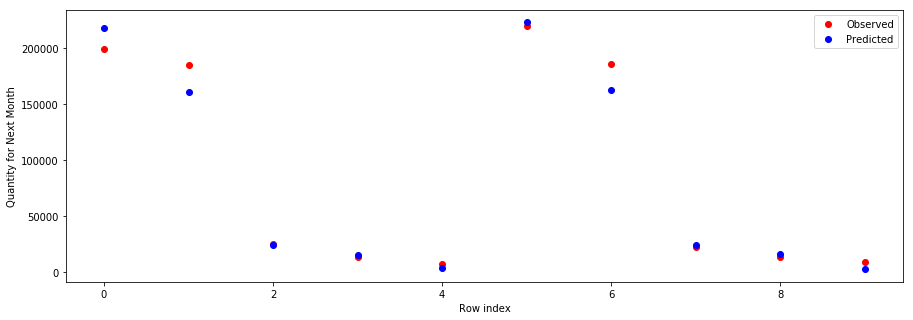

In [105]:
plt.figure(figsize = (15, 5))
plt.xlabel('Row index')
plt.ylabel('Quantity for Next Month')
Obs_QtyNext,= plt.plot(Testing5544.index, ytest, 'ro', label='Observed')
Pred_QtyNext,= plt.plot(Testing5544.index, ypredtest, 'bo', label='Predicted')
plt.legend(handles = [Obs_QtyNext, Pred_QtyNext])
plt.show()